In [26]:
#Loading the packages
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
import csv
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [29]:
#Loading train and test data from the csv files
#Loading train and test data from csv files
def csv_dataread(filename):
    read_data = []
    with open(filename, newline='\n') as csvfile: #newline is 
        data_reader = csv.reader(csvfile, delimiter=',')
        
        #each row at a time
        for row in data_reader:
            read_data.append(list(map(float, row))) 
    return read_data

X_train = csv_dataread("./dataset/X_train_bosten.csv")
y_train = csv_dataread(".\dataset\y_train_bosten.csv")
X_test = csv_dataread(".\dataset\X_test_bosten.csv")
y_test = csv_dataread(".\dataset\y_test_bosten.csv")

#Checking the training input set and label set sizes 
np.size(X_train, 1), np.size(y_train), np.size(y_test)

(13, 354, 152)

In [23]:
boston = pd.DataFrame(X_train)
boston.head() #data header
#boston[13] = y_train

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.62864,0.0,21.89,0.0,0.624,5.019,100.0,1.4394,4.0,437.0,21.2,396.90,34.41
1,0.11460,20.0,6.96,0.0,0.464,6.538,58.7,3.9175,3.0,223.0,18.6,394.96,7.73
2,0.55778,0.0,21.89,0.0,0.624,6.335,98.2,2.1107,4.0,437.0,21.2,394.67,16.96
3,0.06466,70.0,2.24,0.0,0.400,6.345,20.1,7.8278,5.0,358.0,14.8,368.24,4.97
4,0.09299,0.0,25.65,0.0,0.581,5.961,92.9,2.0869,2.0,188.0,19.1,378.09,17.93


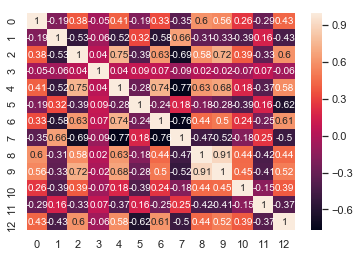

In [71]:
#13 features heatmap....correlation matrix from the given features
correlation_matrix = boston.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

In [73]:
#Data statistics for the 13 features from X_train
boston.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000
mean,3.330036,11.809322,11.078757,0.064972,0.556098,6.308427,68.994068,3.762459,9.353107,401.782486,18.473446,360.601186,12.440650
std,8.345326,23.653056,6.993821,0.246825,0.115601,0.702009,28.038429,2.067661,8.671999,170.592404,2.224809,85.621945,7.078485
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.174200,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.073425,0.000000,4.950000,0.000000,0.450000,5.895250,45.175000,2.107650,4.000000,276.000000,17.400000,376.057500,6.735000
50%,0.262660,0.000000,8.560000,0.000000,0.538000,6.215500,79.450000,3.215700,5.000000,311.000000,19.100000,391.605000,11.160000
75%,2.897595,20.000000,18.100000,0.000000,0.629250,6.647250,93.750000,5.079300,24.000000,666.000000,20.200000,395.690000,16.717500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [30]:
class MyLinearRegression():
    def __init__(self,fit_intercept = True):
        """
        LinearRegression class.
 
        Attributes
        --------------------
            fit_intercept  --  Whether the intercept should be estimated or not.
            coef_          --  The learned coeffient of the linear model
        """
        self.fit_intercept = fit_intercept
        self.coef_ = None

    def generate_features(self,X):
        """
        Returns pre-processed input data
        """
        if self.fit_intercept:
            ones = np.ones((len(X),1))
            return np.concatenate((X,ones),axis=1)
        return X
    
    def fit(self,X,y):
        """
        Finds the coefficients of a linear model that fits the target.
 
        Parameters
        --------------------
            X       -- numpy array of shape (n,d), features
            y       -- numpy array of shape (n,), targets
 
        Returns
        --------------------
            self    -- an instance of self
        """
        X_ = self.generate_features(X)
        n,d = X_.shape

        # implementation start from here

        A = np.dot(X_.T, X_)
        A_inv = np.linalg.inv(A)

        b = np.dot(X_.T, y_train)

        w_ = np.dot(A_inv, b)

        self.coef_ = w_

        # implementation end from here
        
    def predict(self,X):
        """
        Predict output for X.
 
        Parameters
        --------------------
            X       -- numpy array of shape (n,d), features
 
        Returns
        --------------------
            y       -- numpy array of shape (n,), predictions
        """
        if self.coef_ is None:
            raise Exception("fit function not implemented")

        X_ = self.generate_features(X)
        y = np.dot(X_, self.coef_)
        return y

In [31]:
# A build-in linear regression model from sikit-learn
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print('Mean Squared Error: %.2f' % mean_squared_error(y_test, y_pred))

# MyLinearRegression
myreg = MyLinearRegression()
myreg.fit(X_train, y_train)
y_pred = myreg.predict(X_test)
print('Mean Squared Error: %.2f' % mean_squared_error(y_test,y_pred))

Mean Squared Error: 27.18
Mean Squared Error: 27.18


In [33]:
l = 3
r = 9

for i in range(l, r+1):
    print(i)

3
4
5
6
7
8
9
